# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [2]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [3]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


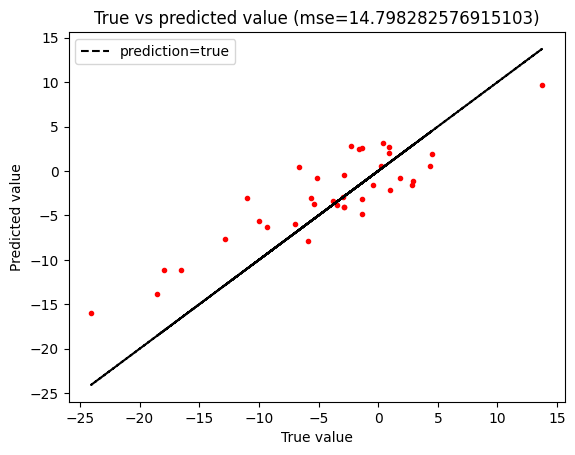

In [7]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.plot(y_test,y_test, color='black', linestyle='--', label='prediction=true')
plt.legend()
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



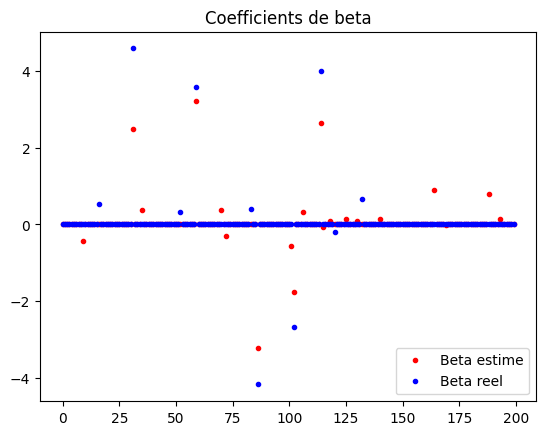

In [8]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

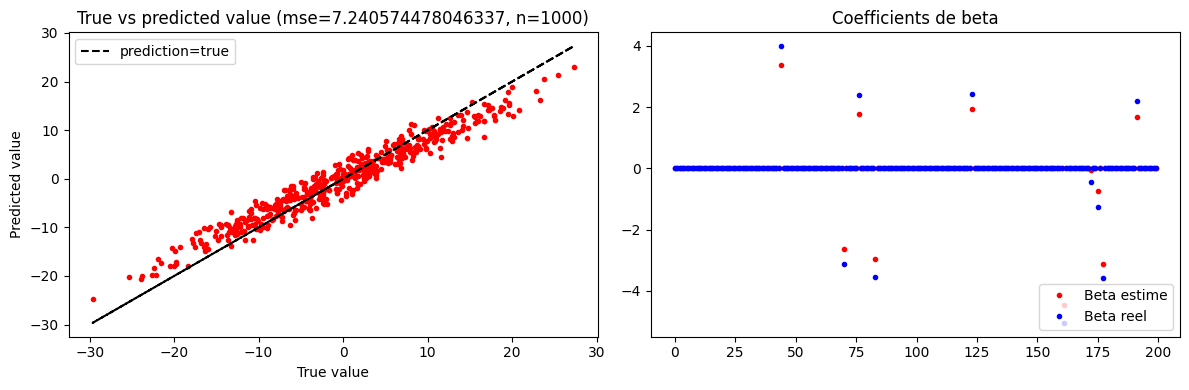

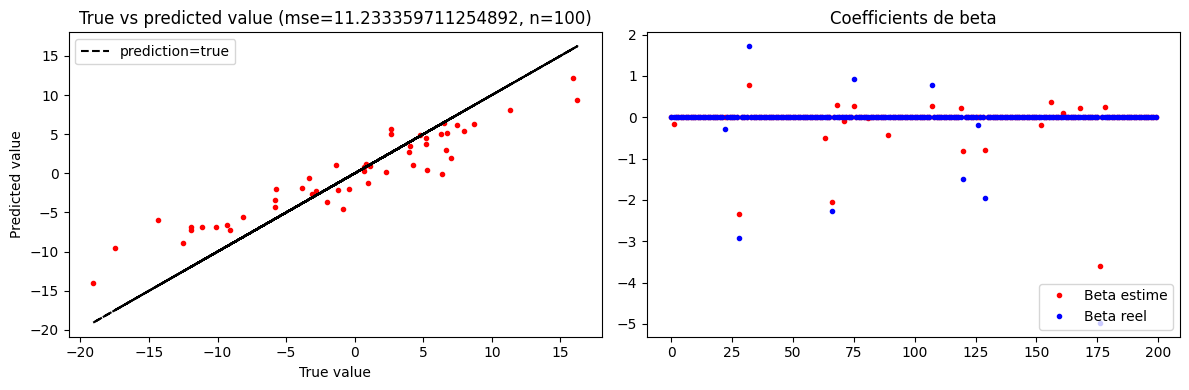

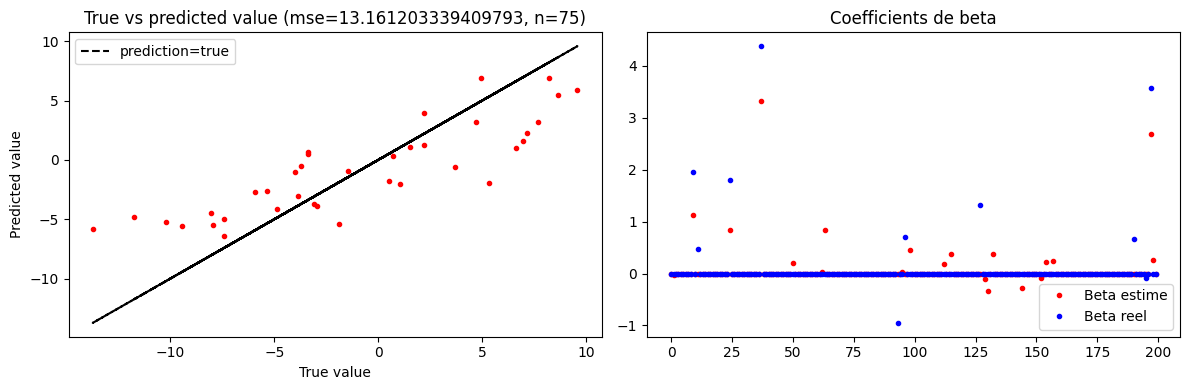

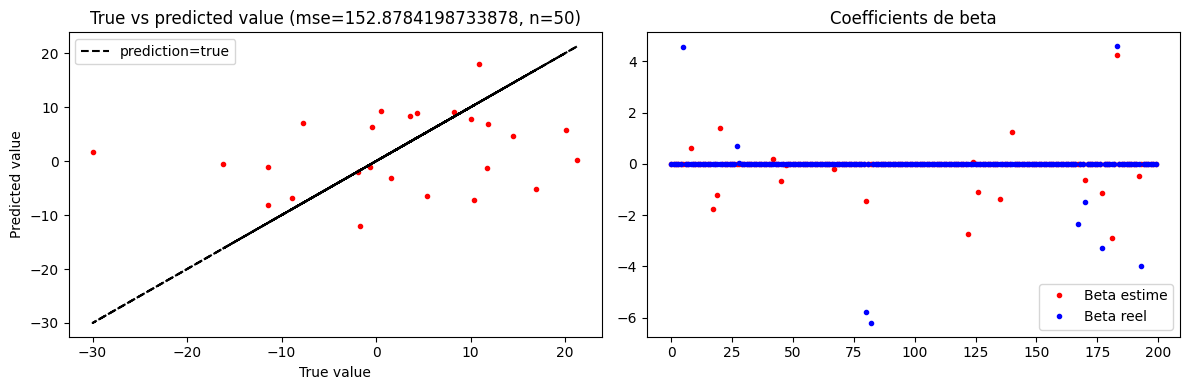

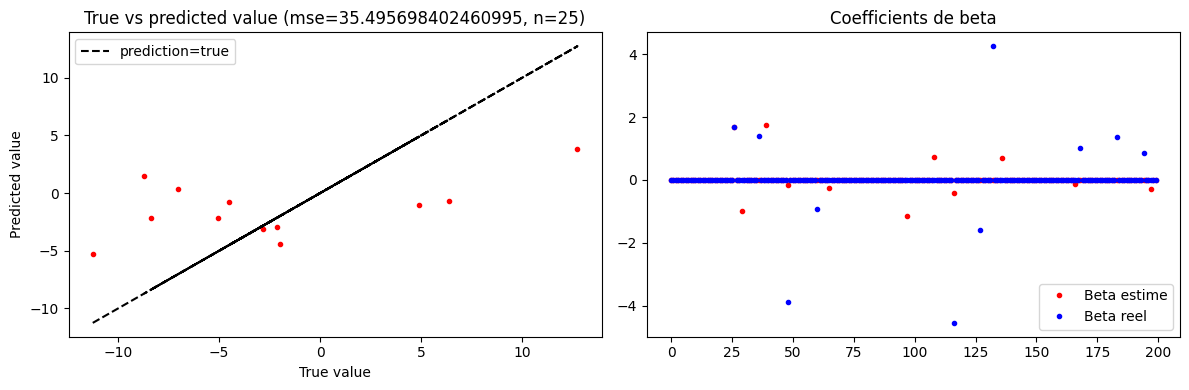

In [11]:
# definition de n et p
n_list = [1000,100,75,50,25]
p =  200

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)

for n in n_list:
    # simulation de X
    X = np.random.randn(n, p) 

    # generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
    beta = 3 * np.random.randn(p)
    inds = np.arange(p)
    np.random.shuffle(inds)
    beta[inds[10:]] = 0 

    #... simulation de y 
    y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))

    # coupe en deux les donnees en donnees d'apprentissage et donnes test
    thresh=n // 2
    X_train = X[thresh:]
    y_train = y[thresh:]
    X_test = X[:thresh]
    y_test = y[:thresh]

    # Lasso prediction
    lasso_regressor.fit(X_train, y_train)

    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # True vs predicted y values
    ax1.plot(y_test, y_pred_lasso, 'r.')
    ax1.plot(y_test,y_test, color='black', linestyle='--', label='prediction=true')
    ax1.legend()
    ax1.set_xlabel('True value')
    ax1.set_ylabel('Predicted value')
    ax1.set_title(f'True vs predicted value (mse={mse_score_lasso}, n={n})')
    
    # True vs predicted betas
    ax2.plot(lasso_regressor.coef_, 'r.')
    ax2.plot(beta, 'b.')
    ax2.legend(('Beta estime', 'Beta reel'), loc='lower right')
    ax2.set_title('Coefficients de beta')

    plt.tight_layout()
    plt.show()



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [ ]:

from sklearn.model_selection import KFold

#...





In [ ]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [ ]:


from sklearn.linear_model import LinearRegression

#...

